In [15]:
# IMPORT
import torch
import os
import sys
os.chdir('..')
sys.path.append(os.getcwd())


# this module is for training and functions related to data preparation
#from Models.training import *
#from Models.cpnn import *
# this is for importing pretrain models.
from Models.pretrain import *

#from models.cpnn_others import cPNNExp
#from models.cpnn_seq import cPNNSeq
#from models.cgru_double import cGRULinearDouble
#from models.clstm import *

import torch.nn.functional as F
import numpy as np
import pandas as pd
import pickle
import argparse
from torch.autograd import Variable
import pprint
import copy


In [ ]:
# TODO
dataset = "weather_pretraining"
batch_size = 128
hidden_size = 250
seq_len = 11
iterations = 1
loss_on_seq = False
freeze_inputs_weights = False
pretraining_samples = 0
pretraining_epochs = 0
write_weights = False
combination = False
model_type='GRU'
if model_type == "GRU":
    model_class = GRU_Model
elif model_type == "LSTM":
    model_class = LSTM_Model


In [ ]:
# EDITABLE PARAMETERS
dataset = "weather_pretraining"

# OTHER PARAMETERS
batch_size = 128
hidden_size = 250
seq_len = 11
# TODO
iterations = 1
loss_on_seq = False
freeze_inputs_weights = False
pretraining_samples = 0
pretraining_epochs = 0
write_weights = False
combination = False
model_type='GRU'
if model_type == "GRU":
    model_class = GRU_Model
else:
    model_class = cGRULinearDouble

#path = os.path.join(
#    "performance/pretrain_GRU"
#)

In [ ]:
df = pd.read_csv("datasets/datasets/weather/weather_pretraining.csv")
df_task = df.drop('task', axis=1)
df_task


,RH,T_d,w_s,w_d,target
0,-0.878049,0.180556,0.142857,-1.333083,1
1,-0.878049,0.138889,0.571429,0.652632,1
2,-0.926829,0.111111,0.357143,-1.298496,1
3,-0.975610,0.125000,0.428571,-0.875188,1
4,-0.926829,0.138889,0.142857,-1.347368,1
...,...,...,...,...,...
24100,-0.707317,1.277778,0.428571,-1.346617,1
24101,0.560976,2.138889,0.714286,-0.121053,1
24102,-0.073171,2.041667,-0.142857,-0.309023,1
24103,-0.390244,1.722222,0.214286,-0.128571,1


In [ ]:
for itter in range(1,11):
  Model = GRU_Model(input_size=4,
        device=torch.device("cpu"),
      	num_layers=1,
        hidden_size=50,
        output_size=2,
        batch_size=128,
          )
  instance = cPNN(seq_len=11)
  with open(f"performance/pretrain/GRU/weather/before/weather-GRU-pretrain-hidden50-epoch10_itter{itter}.pickle", "wb") as fp:
    pickle.dump(Model.state_dict(), fp)

  if len(df_task) % batch_size == 0:
    n_batches = int(len(df_task) / batch_size)
  else:
    n_batches = int(len(df_task) / batch_size) + 1
  optimizer = torch.optim.Adam(Model.parameters(), lr=0.01)
  loss_fn = torch.nn.CrossEntropyLoss(reduction="mean")
  out_h = None
  for j in range(0,10):
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if len(y) >= seq_len:
        x = np.array(x)
        y = list(y)
        x, y, _ = instance._load_batch(x, y)
        y_pred = Model(x)
        y_pred = get_samples_outputs(y_pred)
        pred, _ = get_pred_from_outputs(y_pred)
        loss = loss_fn(y_pred, y)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
  with open(f"performance/pretrain/GRU/weather/after/weather-GRU-pretrain-hidden50-epoch10_itter{itter}.pickle", "wb") as fp:
    pickle.dump(Model.state_dict(), fp)
  print(f'itter {itter} finished......')

itter 1 finished......
itter 2 finished......
itter 3 finished......
itter 4 finished......
itter 5 finished......
itter 6 finished......
itter 7 finished......
itter 8 finished......
itter 9 finished......
itter 10 finished......


In [ ]:
Model = GRU_Model(input_size=4,
        device=torch.device("cpu"),
      	num_layers=1,
        hidden_size=250,
        output_size=2,
        batch_size=128,
          )
instance = cPNN(seq_len=11)

In [ ]:
with open("performance/pretrain/GRU/weather/before/weather-GRU-pretrain-hidden250-epoch10_itter4.pickle", "wb") as fp:
    pickle.dump(Model.state_dict(), fp)

In [ ]:
if len(df_task) % batch_size == 0:
  n_batches = int(len(df_task) / batch_size)
else:
  n_batches = int(len(df_task) / batch_size) + 1
optimizer = torch.optim.Adam(Model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss(reduction="mean")
out_h = None
for j in range(0,10):
  for i in range(0, len(df_task), batch_size):
    x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
    y = list(df_task.iloc[i : i + batch_size, -1])
    if len(y) >= seq_len:
      x = np.array(x)
      y = list(y)
      x, y, _ = instance._load_batch(x, y)
      y_pred = Model(x)
      y_pred = get_samples_outputs(y_pred)
      pred, _ = get_pred_from_outputs(y_pred)
      loss = loss_fn(y_pred, y)
      # backward pass
      optimizer.zero_grad()
      loss.backward()
      # update weights
      optimizer.step()


In [ ]:
with open("performance/pretrain/GRU/weather/after/weather-GRU-pretrain-hidden250-epoch10_itter4.pickle", "wb") as fp:
    pickle.dump(Model.state_dict(), fp)

In [ ]:
path1 = 'results/weather/bestcgru/pretrain_gru-weather-1234-hidden50-epoch10.pkl'
path2 = 'results/weather/bestcgru/pretrain_gru-weather-1432-hidden50-epoch10.pkl'
path3 = 'results/weather/bestcgru/pretrain_gru-weather-2143-hidden50-epoch10.pkl'
path4 = 'results/weather/bestcgru/pretrain_gru-weather-2341-hidden50-epoch10.pkl'

# Open the file in binary read mode
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)
with open(path2, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict2 = pickle.load(file)
with open(path3, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict3 = pickle.load(file)
with open(path4, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict4 = pickle.load(file)

print((np.mean(loaded_dict1['itter_1']['task_1']['kappa'][0:50])+np.mean(loaded_dict1['itter_1']['task_1']['kappa'][0:])+np.mean(loaded_dict1['itter_1']['task_2']['kappa'][0:50])+np.mean(loaded_dict1['itter_1']['task_2']['kappa'][0:])+np.mean(loaded_dict1['itter_1']['task_3']['kappa'][0:50])+np.mean(loaded_dict1['itter_1']['task_3']['kappa'][0:])+np.mean(loaded_dict1['itter_1']['task_4']['kappa'][0:50])+np.mean(loaded_dict1['itter_1']['task_4']['kappa'][0:]))/8)
print((np.mean(loaded_dict2['itter_1']['task_1']['kappa'][0:50])+np.mean(loaded_dict2['itter_1']['task_1']['kappa'][0:])+np.mean(loaded_dict2['itter_1']['task_2']['kappa'][0:50])+np.mean(loaded_dict2['itter_1']['task_2']['kappa'][0:])+np.mean(loaded_dict2['itter_1']['task_3']['kappa'][0:50])+np.mean(loaded_dict2['itter_1']['task_3']['kappa'][0:])+np.mean(loaded_dict2['itter_1']['task_4']['kappa'][0:50])+np.mean(loaded_dict2['itter_1']['task_4']['kappa'][0:]))/8)
print((np.mean(loaded_dict3['itter_1']['task_1']['kappa'][0:50])+np.mean(loaded_dict3['itter_1']['task_1']['kappa'][0:])+np.mean(loaded_dict3['itter_1']['task_2']['kappa'][0:50])+np.mean(loaded_dict3['itter_1']['task_2']['kappa'][0:])+np.mean(loaded_dict3['itter_1']['task_3']['kappa'][0:50])+np.mean(loaded_dict3['itter_1']['task_3']['kappa'][0:])+np.mean(loaded_dict3['itter_1']['task_4']['kappa'][0:50])+np.mean(loaded_dict3['itter_1']['task_4']['kappa'][0:]))/8)
print((np.mean(loaded_dict4['itter_1']['task_1']['kappa'][0:50])+np.mean(loaded_dict4['itter_1']['task_1']['kappa'][0:])+np.mean(loaded_dict4['itter_1']['task_2']['kappa'][0:50])+np.mean(loaded_dict4['itter_1']['task_2']['kappa'][0:])+np.mean(loaded_dict4['itter_1']['task_3']['kappa'][0:50])+np.mean(loaded_dict4['itter_1']['task_3']['kappa'][0:])+np.mean(loaded_dict4['itter_1']['task_4']['kappa'][0:50])+np.mean(loaded_dict4['itter_1']['task_4']['kappa'][0:]))/8)


0.6144660346666425
0.5993955064970302
0.6283674416571634
0.5164701421416263


In [ ]:
path1 = 'results/weather/bestcgru/pretrain_gru-weather-2341-hidden250-epoch10.pkl'

# Open the file in binary read mode
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)


print(((np.mean(loaded_dict1['itter_1']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_4']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_5']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_6']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_7']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_8']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_9']['task_1']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_10']['task_1']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['itter_1']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_4']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_5']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_6']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_7']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_8']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_9']['task_1']['kappa'][0:]))+(np.mean(loaded_dict1['itter_10']['task_1']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['itter_1']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_4']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_5']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_6']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_7']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_8']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_9']['task_2']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_10']['task_2']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['itter_1']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_4']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_5']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_6']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_7']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_8']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_9']['task_2']['kappa'][0:]))+(np.mean(loaded_dict1['itter_10']['task_2']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['itter_1']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_4']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_5']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_6']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_7']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_8']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_9']['task_3']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_10']['task_3']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['itter_1']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_4']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_5']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_6']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_7']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_8']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_9']['task_3']['kappa'][0:]))+(np.mean(loaded_dict1['itter_10']['task_3']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['itter_1']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_2']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_4']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_5']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_6']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_7']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_8']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_9']['task_4']['kappa'][0:50]))+(np.mean(loaded_dict1['itter_10']['task_4']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['itter_1']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_2']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_4']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_5']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_6']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_7']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_8']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_9']['task_4']['kappa'][0:]))+(np.mean(loaded_dict1['itter_10']['task_4']['kappa'][0:])))/10)




0.4877366552613675
0.6805969743826796
0.30693219347763806
0.4941968330209237
0.7206211160421371
0.7635915083229227
0.28687862525437957
0.48229479331149905


In [ ]:
path1 = 'results/sine/cPB/pretrain-T1_gru-sine-2341-hidden300-epoch10_itter1.pkl'
path2 = 'results/sine/cPB/pretrain-T2_gru-sine-2341-hidden300-epoch10_itter1.pkl'
path3 = 'results/sine/cPB/pretrain-T3_gru-sine-2341-hidden300-epoch10_itter1.pkl'
path4 = 'results/sine/cPB/pretrain-T4_gru-sine-2341-hidden300-epoch10_itter1.pkl'

# Open the file in binary read mode
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)
with open(path2, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict2 = pickle.load(file)
with open(path3, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict3 = pickle.load(file)
with open(path4, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict4 = pickle.load(file)

print((np.mean(loaded_dict1['task_1']['kappa'][0:50])+np.mean(loaded_dict1['task_1']['kappa'][0:])+np.mean(loaded_dict1['task_2']['kappa'][0:50])+np.mean(loaded_dict1['task_2']['kappa'][0:])+np.mean(loaded_dict1['task_3']['kappa'][0:50])+np.mean(loaded_dict1['task_3']['kappa'][0:])+np.mean(loaded_dict1['task_4']['kappa'][0:50])+np.mean(loaded_dict1['task_4']['kappa'][0:]))/8)
print((np.mean(loaded_dict2['task_1']['kappa'][0:50])+np.mean(loaded_dict2['task_1']['kappa'][0:])+np.mean(loaded_dict2['task_2']['kappa'][0:50])+np.mean(loaded_dict2['task_2']['kappa'][0:])+np.mean(loaded_dict2['task_3']['kappa'][0:50])+np.mean(loaded_dict2['task_3']['kappa'][0:])+np.mean(loaded_dict2['task_4']['kappa'][0:50])+np.mean(loaded_dict2['task_4']['kappa'][0:]))/8)
print((np.mean(loaded_dict3['task_1']['kappa'][0:50])+np.mean(loaded_dict3['task_1']['kappa'][0:])+np.mean(loaded_dict3['task_2']['kappa'][0:50])+np.mean(loaded_dict3['task_2']['kappa'][0:])+np.mean(loaded_dict3['task_3']['kappa'][0:50])+np.mean(loaded_dict3['task_3']['kappa'][0:])+np.mean(loaded_dict3['task_4']['kappa'][0:50])+np.mean(loaded_dict3['task_4']['kappa'][0:]))/8)
print((np.mean(loaded_dict4['task_1']['kappa'][0:50])+np.mean(loaded_dict4['task_1']['kappa'][0:])+np.mean(loaded_dict4['task_2']['kappa'][0:50])+np.mean(loaded_dict4['task_2']['kappa'][0:])+np.mean(loaded_dict4['task_3']['kappa'][0:50])+np.mean(loaded_dict4['task_3']['kappa'][0:])+np.mean(loaded_dict4['task_4']['kappa'][0:50])+np.mean(loaded_dict4['task_4']['kappa'][0:]))/8)


0.7440471644188141
0.754765808287826
0.7171116059957081
0.7338017821805093


In [ ]:
path1 = 'results/sine/cPB/pretrain-T1_gru-sine-2341-hidden300-epoch10_itter1.pkl'
path2 = 'results/sine/cPB/pretrain-T2_gru-sine-2341-hidden300-epoch10_itter1.pkl'
path3 = 'results/sine/cPB/pretrain-T3_gru-sine-2341-hidden300-epoch10_itter1.pkl'
path4 = 'results/sine/cPB/pretrain-T4_gru-sine-2341-hidden300-epoch10_itter1.pkl'

# Open the file in binary read mode
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)
with open(path2, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict2 = pickle.load(file)
with open(path3, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict3 = pickle.load(file)
with open(path4, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict4 = pickle.load(file)

print((np.mean(loaded_dict1['task_1']['kappa'][0:50])))
print((np.mean(loaded_dict2['task_1']['kappa'][0:50])))
print((np.mean(loaded_dict3['task_1']['kappa'][0:50])))
print((np.mean(loaded_dict4['task_1']['kappa'][0:50])))

print((np.mean(loaded_dict1['task_1']['kappa'][0:])))
print((np.mean(loaded_dict2['task_1']['kappa'][0:])))
print((np.mean(loaded_dict3['task_1']['kappa'][0:])))
print((np.mean(loaded_dict4['task_1']['kappa'][0:])))
print(40*'-')

print((np.mean(loaded_dict1['task_2']['kappa'][0:50])))
print((np.mean(loaded_dict2['task_2']['kappa'][0:50])))
print((np.mean(loaded_dict3['task_2']['kappa'][0:50])))
print((np.mean(loaded_dict4['task_2']['kappa'][0:50])))

print((np.mean(loaded_dict1['task_2']['kappa'][0:])))
print((np.mean(loaded_dict2['task_2']['kappa'][0:])))
print((np.mean(loaded_dict3['task_2']['kappa'][0:])))
print((np.mean(loaded_dict4['task_2']['kappa'][0:])))
print(40*'-')

print((np.mean(loaded_dict1['task_3']['kappa'][0:50])))
print((np.mean(loaded_dict2['task_3']['kappa'][0:50])))
print((np.mean(loaded_dict3['task_3']['kappa'][0:50])))
print((np.mean(loaded_dict4['task_3']['kappa'][0:50])))

print((np.mean(loaded_dict1['task_3']['kappa'][0:])))
print((np.mean(loaded_dict2['task_3']['kappa'][0:])))
print((np.mean(loaded_dict3['task_3']['kappa'][0:])))
print((np.mean(loaded_dict4['task_3']['kappa'][0:])))
print(40*'-')

print((np.mean(loaded_dict1['task_4']['kappa'][0:50])))
print((np.mean(loaded_dict2['task_4']['kappa'][0:50])))
print((np.mean(loaded_dict3['task_4']['kappa'][0:50])))
print((np.mean(loaded_dict4['task_4']['kappa'][0:50])))

print((np.mean(loaded_dict1['task_4']['kappa'][0:])))
print((np.mean(loaded_dict2['task_4']['kappa'][0:])))
print((np.mean(loaded_dict3['task_4']['kappa'][0:])))
print((np.mean(loaded_dict4['task_4']['kappa'][0:])))



0.44294526867568496
0.5151168508827686
0.43866123389452694
0.4077236456982791
0.6534677900200903
0.6771902353935392
0.6205032395346528
0.6224060443833043
----------------------------------------
0.8400285881757736
0.8435482178628445
0.7943675892055034
0.8579867911338807
0.7821135915172994
0.7314565424481999
0.7403750881580471
0.7411879275041557
----------------------------------------
0.8173144036531448
0.8921432769298554
0.8320554739236832
0.8976291334629058
0.7255793243189297
0.7216828485660236
0.7188800062288714
0.7690961367029059
----------------------------------------
0.8550991383194924
0.8554280769824981
0.8292034065723419
0.8222617235779762
0.835829210670098
0.8015604172368793
0.7628468104480394
0.7521228549806663


In [ ]:

def list_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

directory_path = 'results/sine/cPB/'
files = list_files(directory_path)

print("List of files in the directory:")
for file in files:
    print(file)

List of files in the directory:
pretrain-T1_gru-sine-1234-hidden250-epoch10_itter1.pkl
pretrain-T1_gru-sine-1234-hidden250-epoch10_itter1_selectedMask.pkl
pretrain-T2_gru-sine-1234-hidden250-epoch10_itter1.pkl
pretrain-T2_gru-sine-1234-hidden250-epoch10_itter1_selectedMask.pkl
pretrain-T3_gru-sine-1234-hidden250-epoch10_itter1.pkl
pretrain-T3_gru-sine-1234-hidden250-epoch10_itter1_selectedMask.pkl
pretrain-T4_gru-sine-1234-hidden250-epoch10_itter1.pkl
pretrain-T4_gru-sine-1234-hidden250-epoch10_itter1_selectedMask.pkl
pretrain-T1_gru-sine-1432-hidden250-epoch10_itter1.pkl
pretrain-T1_gru-sine-1432-hidden250-epoch10_itter1_selectedMask.pkl
pretrain-T2_gru-sine-1432-hidden250-epoch10_itter1.pkl
pretrain-T2_gru-sine-1432-hidden250-epoch10_itter1_selectedMask.pkl
pretrain-T4_gru-sine-1432-hidden250-epoch10_itter1.pkl
pretrain-T4_gru-sine-1432-hidden250-epoch10_itter1_selectedMask.pkl
pretrain-T3_gru-sine-1432-hidden250-epoch10_itter1.pkl
pretrain-T3_gru-sine-1432-hidden250-epoch10_itter1_s

In [ ]:
path1 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter1.pkl'
path2 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter2.pkl'
path3 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter3.pkl'
path4 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter4.pkl'
path5 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter5.pkl'
path6 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter6.pkl'
path7 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter7.pkl'
path8 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter8.pkl'
path9 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter9.pkl'
path10 = 'results/sine/cPB/pretrain-T1_gru-sine-1432-hidden300-epoch10_itter10.pkl'


# Open the file in binary read mode
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)

with open(path2, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict2 = pickle.load(file)

with open(path3, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict3 = pickle.load(file)

with open(path4, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict4 = pickle.load(file)

with open(path5, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict5 = pickle.load(file)

with open(path6, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict6 = pickle.load(file)

with open(path7, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict7 = pickle.load(file)

with open(path8, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict8 = pickle.load(file)

with open(path9, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict9 = pickle.load(file)

with open(path10, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict10 = pickle.load(file)



print(((np.mean(loaded_dict1['task_1']['kappa'][0:50]))+(np.mean(loaded_dict2['task_1']['kappa'][0:50]))+(np.mean(loaded_dict3['task_1']['kappa'][0:50]))+(np.mean(loaded_dict4['task_1']['kappa'][0:50]))+(np.mean(loaded_dict5['task_1']['kappa'][0:50]))+(np.mean(loaded_dict6['task_1']['kappa'][0:50]))+(np.mean(loaded_dict7['task_1']['kappa'][0:50]))+(np.mean(loaded_dict8['task_1']['kappa'][0:50]))+(np.mean(loaded_dict9['task_1']['kappa'][0:50]))+(np.mean(loaded_dict10['task_1']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_1']['kappa'][0:]))+(np.mean(loaded_dict2['task_1']['kappa'][0:]))+(np.mean(loaded_dict3['task_1']['kappa'][0:]))+(np.mean(loaded_dict4['task_1']['kappa'][0:]))+(np.mean(loaded_dict5['task_1']['kappa'][0:]))+(np.mean(loaded_dict6['task_1']['kappa'][0:]))+(np.mean(loaded_dict7['task_1']['kappa'][0:]))+(np.mean(loaded_dict8['task_1']['kappa'][0:]))+(np.mean(loaded_dict9['task_1']['kappa'][0:]))+(np.mean(loaded_dict10['task_1']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['task_2']['kappa'][0:50]))+(np.mean(loaded_dict2['task_2']['kappa'][0:50]))+(np.mean(loaded_dict3['task_2']['kappa'][0:50]))+(np.mean(loaded_dict4['task_2']['kappa'][0:50]))+(np.mean(loaded_dict5['task_2']['kappa'][0:50]))+(np.mean(loaded_dict6['task_2']['kappa'][0:50]))+(np.mean(loaded_dict7['task_2']['kappa'][0:50]))+(np.mean(loaded_dict8['task_2']['kappa'][0:50]))+(np.mean(loaded_dict9['task_2']['kappa'][0:50]))+(np.mean(loaded_dict10['task_2']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_2']['kappa'][0:]))+(np.mean(loaded_dict2['task_2']['kappa'][0:]))+(np.mean(loaded_dict3['task_2']['kappa'][0:]))+(np.mean(loaded_dict4['task_2']['kappa'][0:]))+(np.mean(loaded_dict5['task_2']['kappa'][0:]))+(np.mean(loaded_dict6['task_2']['kappa'][0:]))+(np.mean(loaded_dict7['task_2']['kappa'][0:]))+(np.mean(loaded_dict8['task_2']['kappa'][0:]))+(np.mean(loaded_dict9['task_2']['kappa'][0:]))+(np.mean(loaded_dict10['task_2']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['task_3']['kappa'][0:50]))+(np.mean(loaded_dict2['task_3']['kappa'][0:50]))+(np.mean(loaded_dict3['task_3']['kappa'][0:50]))+(np.mean(loaded_dict4['task_3']['kappa'][0:50]))+(np.mean(loaded_dict5['task_3']['kappa'][0:50]))+(np.mean(loaded_dict6['task_3']['kappa'][0:50]))+(np.mean(loaded_dict7['task_3']['kappa'][0:50]))+(np.mean(loaded_dict8['task_3']['kappa'][0:50]))+(np.mean(loaded_dict9['task_3']['kappa'][0:50]))+(np.mean(loaded_dict10['task_3']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_3']['kappa'][0:]))+(np.mean(loaded_dict2['task_3']['kappa'][0:]))+(np.mean(loaded_dict3['task_3']['kappa'][0:]))+(np.mean(loaded_dict4['task_3']['kappa'][0:]))+(np.mean(loaded_dict5['task_3']['kappa'][0:]))+(np.mean(loaded_dict6['task_3']['kappa'][0:]))+(np.mean(loaded_dict7['task_3']['kappa'][0:]))+(np.mean(loaded_dict8['task_3']['kappa'][0:]))+(np.mean(loaded_dict9['task_3']['kappa'][0:]))+(np.mean(loaded_dict10['task_3']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['task_4']['kappa'][0:50]))+(np.mean(loaded_dict2['task_4']['kappa'][0:50]))+(np.mean(loaded_dict3['task_4']['kappa'][0:50]))+(np.mean(loaded_dict4['task_4']['kappa'][0:50]))+(np.mean(loaded_dict5['task_4']['kappa'][0:50]))+(np.mean(loaded_dict6['task_4']['kappa'][0:50]))+(np.mean(loaded_dict7['task_4']['kappa'][0:50]))+(np.mean(loaded_dict8['task_4']['kappa'][0:50]))+(np.mean(loaded_dict9['task_4']['kappa'][0:50]))+(np.mean(loaded_dict10['task_4']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_4']['kappa'][0:]))+(np.mean(loaded_dict2['task_4']['kappa'][0:]))+(np.mean(loaded_dict3['task_4']['kappa'][0:]))+(np.mean(loaded_dict4['task_4']['kappa'][0:]))+(np.mean(loaded_dict5['task_4']['kappa'][0:]))+(np.mean(loaded_dict6['task_4']['kappa'][0:]))+(np.mean(loaded_dict7['task_4']['kappa'][0:]))+(np.mean(loaded_dict8['task_4']['kappa'][0:]))+(np.mean(loaded_dict9['task_4']['kappa'][0:]))+(np.mean(loaded_dict10['task_4']['kappa'][0:])))/10)




0.4214466546617913
0.7527121121808917
0.7740438985750079
0.7152546176274346
0.8845941739082337
0.7657311998808867
0.8159152419958264
0.7153040196919874


In [ ]:
path1 = 'results/sine/cPB/pretrain-T4_gru-sine-2341-hidden300-epoch10_itter1_selectedMask.pkl'
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)
loaded_dict1

[0, 1, 1, 1]

In [ ]:
path1 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter1.pkl'
path2 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter2.pkl'
path3 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter3.pkl'
path4 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter4.pkl'
path5 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter5.pkl'
path6 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter6.pkl'
path7 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter7.pkl'
path8 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter8.pkl'
path9 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter9.pkl'
path10 = 'results/weather/cPB/pretrain_gru-weather-1234-hidden300-epoch10_itter10.pkl'


# Open the file in binary read mode
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)

with open(path2, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict2 = pickle.load(file)

with open(path3, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict3 = pickle.load(file)

with open(path4, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict4 = pickle.load(file)

with open(path5, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict5 = pickle.load(file)

with open(path6, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict6 = pickle.load(file)

with open(path7, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict7 = pickle.load(file)

with open(path8, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict8 = pickle.load(file)

with open(path9, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict9 = pickle.load(file)

with open(path10, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict10 = pickle.load(file)



print(((np.mean(loaded_dict1['task_1']['kappa'][0:50]))+(np.mean(loaded_dict2['task_1']['kappa'][0:50]))+(np.mean(loaded_dict3['task_1']['kappa'][0:50]))+(np.mean(loaded_dict4['task_1']['kappa'][0:50]))+(np.mean(loaded_dict5['task_1']['kappa'][0:50]))+(np.mean(loaded_dict6['task_1']['kappa'][0:50]))+(np.mean(loaded_dict7['task_1']['kappa'][0:50]))+(np.mean(loaded_dict8['task_1']['kappa'][0:50]))+(np.mean(loaded_dict9['task_1']['kappa'][0:50]))+(np.mean(loaded_dict10['task_1']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_1']['kappa'][0:]))+(np.mean(loaded_dict2['task_1']['kappa'][0:]))+(np.mean(loaded_dict3['task_1']['kappa'][0:]))+(np.mean(loaded_dict4['task_1']['kappa'][0:]))+(np.mean(loaded_dict5['task_1']['kappa'][0:]))+(np.mean(loaded_dict6['task_1']['kappa'][0:]))+(np.mean(loaded_dict7['task_1']['kappa'][0:]))+(np.mean(loaded_dict8['task_1']['kappa'][0:]))+(np.mean(loaded_dict9['task_1']['kappa'][0:]))+(np.mean(loaded_dict10['task_1']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['task_2']['kappa'][0:50]))+(np.mean(loaded_dict2['task_2']['kappa'][0:50]))+(np.mean(loaded_dict3['task_2']['kappa'][0:50]))+(np.mean(loaded_dict4['task_2']['kappa'][0:50]))+(np.mean(loaded_dict5['task_2']['kappa'][0:50]))+(np.mean(loaded_dict6['task_2']['kappa'][0:50]))+(np.mean(loaded_dict7['task_2']['kappa'][0:50]))+(np.mean(loaded_dict8['task_2']['kappa'][0:50]))+(np.mean(loaded_dict9['task_2']['kappa'][0:50]))+(np.mean(loaded_dict10['task_2']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_2']['kappa'][0:]))+(np.mean(loaded_dict2['task_2']['kappa'][0:]))+(np.mean(loaded_dict3['task_2']['kappa'][0:]))+(np.mean(loaded_dict4['task_2']['kappa'][0:]))+(np.mean(loaded_dict5['task_2']['kappa'][0:]))+(np.mean(loaded_dict6['task_2']['kappa'][0:]))+(np.mean(loaded_dict7['task_2']['kappa'][0:]))+(np.mean(loaded_dict8['task_2']['kappa'][0:]))+(np.mean(loaded_dict9['task_2']['kappa'][0:]))+(np.mean(loaded_dict10['task_2']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['task_3']['kappa'][0:50]))+(np.mean(loaded_dict2['task_3']['kappa'][0:50]))+(np.mean(loaded_dict3['task_3']['kappa'][0:50]))+(np.mean(loaded_dict4['task_3']['kappa'][0:50]))+(np.mean(loaded_dict5['task_3']['kappa'][0:50]))+(np.mean(loaded_dict6['task_3']['kappa'][0:50]))+(np.mean(loaded_dict7['task_3']['kappa'][0:50]))+(np.mean(loaded_dict8['task_3']['kappa'][0:50]))+(np.mean(loaded_dict9['task_3']['kappa'][0:50]))+(np.mean(loaded_dict10['task_3']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_3']['kappa'][0:]))+(np.mean(loaded_dict2['task_3']['kappa'][0:]))+(np.mean(loaded_dict3['task_3']['kappa'][0:]))+(np.mean(loaded_dict4['task_3']['kappa'][0:]))+(np.mean(loaded_dict5['task_3']['kappa'][0:]))+(np.mean(loaded_dict6['task_3']['kappa'][0:]))+(np.mean(loaded_dict7['task_3']['kappa'][0:]))+(np.mean(loaded_dict8['task_3']['kappa'][0:]))+(np.mean(loaded_dict9['task_3']['kappa'][0:]))+(np.mean(loaded_dict10['task_3']['kappa'][0:])))/10)


print(((np.mean(loaded_dict1['task_4']['kappa'][0:50]))+(np.mean(loaded_dict2['task_4']['kappa'][0:50]))+(np.mean(loaded_dict3['task_4']['kappa'][0:50]))+(np.mean(loaded_dict4['task_4']['kappa'][0:50]))+(np.mean(loaded_dict5['task_4']['kappa'][0:50]))+(np.mean(loaded_dict6['task_4']['kappa'][0:50]))+(np.mean(loaded_dict7['task_4']['kappa'][0:50]))+(np.mean(loaded_dict8['task_4']['kappa'][0:50]))+(np.mean(loaded_dict9['task_4']['kappa'][0:50]))+(np.mean(loaded_dict10['task_4']['kappa'][0:50])))/10)
print(((np.mean(loaded_dict1['task_4']['kappa'][0:]))+(np.mean(loaded_dict2['task_4']['kappa'][0:]))+(np.mean(loaded_dict3['task_4']['kappa'][0:]))+(np.mean(loaded_dict4['task_4']['kappa'][0:]))+(np.mean(loaded_dict5['task_4']['kappa'][0:]))+(np.mean(loaded_dict6['task_4']['kappa'][0:]))+(np.mean(loaded_dict7['task_4']['kappa'][0:]))+(np.mean(loaded_dict8['task_4']['kappa'][0:]))+(np.mean(loaded_dict9['task_4']['kappa'][0:]))+(np.mean(loaded_dict10['task_4']['kappa'][0:])))/10)




0.1603870524750673
0.34726297085766333
0.8014981232881546
0.6588641183459034
0.39845091156661505
0.4827140631038726
0.8536327456235885
0.7396831131046995


In [ ]:
path1 = 'performance/acpnn_qcpnn/2341_1/performance_128.pkl'
# Open the file in binary read mode
with open(path1, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict1 = pickle.load(file)


path2 = 'performance/acpnn_qcpnn/2341_1-2/performance_128.pkl'
# Open the file in binary read mode
with open(path2, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict2 = pickle.load(file)


path3 = 'performance/acpnn_qcpnn/2341_1-2-/performance_128.pkl'


# Open the file in binary read mode
with open(path3, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict3 = pickle.load(file)



path4 = 'performance/acpnn_qcpnn/2341_1-2--/performance_128.pkl'


# Open the file in binary read mode
with open(path4, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict4 = pickle.load(file)

path5 = 'performance/acpnn_qcpnn/2341_1-2-3/performance_128.pkl'


# Open the file in binary read mode
with open(path5, 'rb') as file:
    # Load the dictionary from the file using pickle
    loaded_dict5 = pickle.load(file)


In [ ]:
file_path = 'performance/acpnn_qcpnn/2341_all/performance_128_10.pkl'

# Open the file in binary write mode
with open(file_path, 'wb') as file:
    # Dump the dictionary into the file using pickle
    pickle.dump(loaded_dict1, file)

In [ ]:
loaded_dict1['ARF_batch']['batch']['kappa'][9]= loaded_dict5['ARF_batch']['batch']['kappa'][2]

In [ ]:
tot1= np.average(loaded_dict1['ARF_batch']['batch']['kappa'][0][0:50])
tot2= np.sum(loaded_dict2['ARF_batch']['batch']['kappa'][0][0:50])+np.sum(loaded_dict2['ARF_batch']['batch']['kappa'][1][0:50])
tot3= np.sum(loaded_dict3['ARF_batch']['batch']['kappa'][0][0:50])+np.sum(loaded_dict3['ARF_batch']['batch']['kappa'][1][0:50])+np.sum(loaded_dict3['ARF_batch']['batch']['kappa'][2][0:50])
tot4= np.sum(loaded_dict4['ARF_batch']['batch']['kappa'][0][0:50])+np.sum(loaded_dict4['ARF_batch']['batch']['kappa'][1][0:50])+np.sum(loaded_dict4['ARF_batch']['batch']['kappa'][2][0:50])+np.sum(loaded_dict4['ARF_batch']['batch']['kappa'][3][0:50])
(tot1+tot2+tot3+tot4)/(10*50)

0.28584884184360054

In [ ]:
loaded_dict1['ARF_batch']['batch'].keys()

dict_keys(['accuracy', 'kappa'])

In [ ]:
np.average(loaded_dict1['ARF_batch']['batch']['kappa'][0][189:378])

0.36058968469021124

In [ ]:
total=0
for i in range(0,10):
  total += np.sum(loaded_dict1['ARF_batch']['batch']['kappa'][i][drifts[2]:drifts[3]])
total/(10*drifts[0])

0.3400711186475445

In [ ]:
drifts = loaded_dict1['ARF_batch']['drifts']
drifts

[391, 782, 1173, 1564]

In [ ]:
np.average(loaded_dict1['ARF_batch']['batch']['kappa'][0][0:50]+loaded_dict1['ARF_batch']['batch']['kappa'][0][0:50])

0.24363439387847682

In [ ]:
loaded_dict1['ARF_batch']['batch']['kappa'][0][0:20]

[0.0,
 -0.05263157894736842,
 -0.14042553191489363,
 0.109375,
 0.12016293279022404,
 0.08171206225680934,
 0.07411167512690356,
 0.19918283963227784,
 -0.03664365374402549,
 0.08267212695162529,
 0.046875,
 0.05039652084932208,
 0.1799163179916318,
 0.05112474437627812,
 0.07586882036221243,
 0.012853470437017995,
 -0.028175976272862086,
 0.08837209302325581,
 0.06333973128598848,
 0.047619047619047616]

In [ ]:
loaded_dict1['ARF_batch']['batch']['kappa'][1][0:20]

[0.0,
 0.006838506049447659,
 0.09881820467689213,
 0.046875,
 0.03967446592065107,
 0.015384615384615385,
 0.16360894697160092,
 0.08525576730190572,
 0.07611548556430446,
 0.11134846461949266,
 0.1447661469933185,
 0.27993570854540584,
 -0.06210711591651999,
 0.07785642062689585,
 -0.052011776251226695,
 0.04079933388842631,
 0.19921491658488713,
 0.0,
 0.06455542021924482,
 0.0533462657613967]

In [ ]:
drifts = loaded_dict1['ARF_batch']["drifts"][0]

In [ ]:
loaded_dict1['ARF_batch']['batch']['kappa'][0]

[0.0,
 -0.05263157894736842,
 -0.14042553191489363,
 0.109375,
 0.12016293279022404,
 0.08171206225680934,
 0.07411167512690356,
 0.19918283963227784,
 -0.03664365374402549,
 0.08267212695162529,
 0.046875,
 0.05039652084932208,
 0.1799163179916318,
 0.05112474437627812,
 0.07586882036221243,
 0.012853470437017995,
 -0.028175976272862086,
 0.08837209302325581,
 0.06333973128598848,
 0.047619047619047616,
 0.1677052289352479,
 0.04950495049504951,
 -0.052528227785959745,
 0.09028691760989734,
 0.07474086197490452,
 0.0340201245807379,
 0.1841831425598335,
 -0.01612115290669272,
 0.24663677130044842,
 0.23736892278360344,
 0.08368304122438903,
 0.11841469308844853,
 0.05604719764011799,
 -0.04891979140799603,
 -0.04837471205528539,
 0.04299065420560748,
 0.03270564915758176,
 0.2162625520450649,
 0.37404580152671757,
 0.09881820467689213,
 0.25922353508560403,
 0.18926974664679583,
 0.06870229007633588,
 0.014301430143014302,
 0.04991041719989762,
 0.38653247064462015,
 0.048269137006338

## trying to read the weights of the pretrain model

In [ ]:
pretrain_model = PretrainModel(input_size=2,
        device=torch.device("cpu"),
      	num_layers=1,
        hidden_size=50,
        output_size=2,
        batch_size=128,
          )
with open("performance/pretrain/pretrain_mode_gru_sine_rw10_mode5_extended_6-6_1234_4.pickle", "rb") as fp:
    pretrain_model.load_state_dict(pickle.load(fp),strict=False)

In [ ]:
import statistics

In [ ]:

dataset1 = "sine_rw10_mode5_extended_6-6_1234"
pretrain_data = pd.read_csv(os.path.join("datasets/datasets", f"{dataset1}.csv"))
pretrain_data = pretrain_data[pretrain_data["task"] == 1]
pretrain_data.loc[:, 'task'] = 0
dataset2 = "sine_rw10_mode5_extended_16-16_1234"
df = pd.read_csv(os.path.join("datasets/datasets", f"{dataset2}.csv"))

df = pretrain_data.append(df, ignore_index=True)

acc=[]
kappa=[]
for task in range(1, df["task"].max() + 1):
  acc[-1].append([])
  kappa[-1].append([])
  df_task = df[df["task"] == task]
  df_task = df_task.drop(columns="task")
  for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if len(y) >= seq_len:
        x = np.array(x)
        y = list(y)
        x, y, _ = instance._load_batch(x, y)
        y_pred = pretrain_model(x)
        y_pred = get_samples_outputs(y_pred)
        pred, _ = get_pred_from_outputs(y_pred)
        acc[-1][-1].append(accuracy_score(np.array(y),np.array(pred)))
        kappa[-1][-1].append(cohen_kappa(y,pred).item())
  print(statistics.mean(acc))


0.35121882992327363
0.20711317135549873
0.6440776854219948
0.8104859335038364


In [ ]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(pretrain_model.state_dict())

OrderedDict([   (   'gru.weight_ih_l0',
                    tensor([[ 4.9395e-01,  7.2624e-01],
        [-2.5023e-01, -1.5779e+00],
        [ 4.2910e-02, -2.2821e-03],
        [-2.7951e-01, -9.4084e-02],
        [-4.2295e-01, -2.2655e-01],
        [-7.1322e-01, -6.1827e-01],
        [-1.0246e-02, -3.2005e-01],
        [-4.1410e-01, -1.2440e+00],
        [-7.2617e-01, -7.9609e-01],
        [-5.6529e-01, -9.9232e-01],
        [-5.3829e-01, -1.3724e+00],
        [-4.4110e-01, -1.1477e+00],
        [-4.6161e-01, -9.9819e-01],
        [-3.8753e-01,  8.9283e-01],
        [-6.3671e-01, -1.5068e+00],
        [-7.4016e-01, -1.4635e+00],
        [-2.6262e-01, -5.4108e-02],
        [-8.1440e-01, -1.1812e+00],
        [-2.4015e-01, -5.9275e-01],
        [-7.2938e-01, -1.5080e+00],
        [ 1.7937e-01,  2.7415e-01],
        [-4.2030e-01, -5.6660e-01],
        [-5.5590e-01, -5.9604e-01],
        [-5.3422e-01, -5.8739e-01],
        [-3.8810e-01,  2.8452e-01],
        [-9.4800e-02,  7.1795e-01],
    

In [ ]:
pretrain_model

PretrainModel(
  (gru): GRU(2, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
x = copy.deepcopy(pretrain_model.state_dict())
for param_name in x:
  print(param_name)
  print(x[param_name].shape)

gru.weight_ih_l0
torch.Size([150, 2])
gru.weight_hh_l0
torch.Size([150, 50])
gru.bias_ih_l0
torch.Size([150])
gru.bias_hh_l0
torch.Size([150])
linear.weight
torch.Size([2, 50])
linear.bias
torch.Size([2])


# Here first we need to train pure GRU or LSTM based models

In [ ]:
batch_size = 128
hidden_size = 300
seq_len = 10
epoch_size=5
mask_init='uniform'
dataset1 = "weather_mountain_ta_st125_pretrain"
pretrain_data = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset1}.csv"))
#pretrain_data = pretrain_data[pretrain_data["task"] == 1]
pretrain_data.loc[:, 'task'] = 0
dataset2 = "weather_mountain_ta_st124_1234"
df = pd.read_csv(os.path.join("datasets/datasets", f"{dataset2}.csv"))

df = pretrain_data.append(df, ignore_index=True)


instance = cPB(seq_len=seq_len)
pretrain_model = GRU_Model(
        input_size=4,
        device=torch.device("cpu"),
      	num_layers=1,
        hidden_size=hidden_size,
        output_size=2,
        batch_size=batch_size,
          )
acc=[]
kappa=[]
optimizer = torch.optim.Adam(pretrain_model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss(reduction="mean")
for task in range(1, df["task"].max() + 1):
  df_task = df[df["task"] == task]
  df_task = df_task.drop(columns="task")
  acc.append([])
  kappa.append([])
  for i in range(0, len(df_task), batch_size):
    x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
    y = list(df_task.iloc[i : i + batch_size, -1])
    if len(y) >= seq_len:
      x = np.array(x)
      y = list(y)
      x, y, _ = instance._load_batch(x, y)
      y_pred = pretrain_model(x)
      y_pred = get_samples_outputs(y_pred)
      pred, _ = get_pred_from_outputs(y_pred)
      acc[-1].append(accuracy_score(np.array(y),np.array(pred)))
      kappa[-1].append(cohen_kappa(y,pred).item())
      for j in range(0,5):
        loss = loss_fn(y_pred, y)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
        y_pred = pretrain_model(x)
        y_pred = get_samples_outputs(y_pred)
        pred, _ = get_pred_from_outputs(y_pred)


<ipython-input-31-780275898f74>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pretrain_data.append(df, ignore_index=True)


hidden_size 50


In [ ]:
np.array(acc).shape

(4, 189)

In [ ]:
pd.DataFrame(acc).to_csv('results/weather/acc-weather_mountain_ta_st124_1234-pretrain-cGRU-hidden300.csv', index=False)
pd.DataFrame(kappa).to_csv('results/weather/kappa-weather_mountain_ta_st124_1234-pretrain-cGRU-hidden300.csv', index=False)

#**From now on, the part for adding mask will be implemented:**

##The first part is the implementing of the frozen pretrained model and then testing on test dataset.

In [ ]:
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size=5
mask_init='uniform'
dataset = "sine_rw10_mode5_extended_16-16_1432"
df = pd.read_csv(os.path.join("datasets/datasets", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/pretrain_mode_gru_sine_rw10_mode5_extended_6-6_1234_4.pickle'

number_of_tasks=4
instance = cPB(seq_len=seq_len)
pretrain_model = PretrainModel(
        input_size=2,
        device=torch.device("cpu"),
      	num_layers=1,
        hidden_size=hidden_size,
        output_size=2,
        batch_size=batch_size,
          )
with open(pretrain_model_addr, "rb") as fp:
    		    pretrain_model.load_state_dict(pickle.load(fp),strict=False)
acc=[]
kappa=[]
for task in range(1, df["task"].max() + 1):
  df_task = df[df["task"] == task]
  df_task = df_task.drop(columns="task")
  acc.append([])
  kappa.append([])
  for i in range(0, len(df_task), batch_size):
    x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
    y = list(df_task.iloc[i : i + batch_size, -1])
    if len(y) >= seq_len:
      x = np.array(x)
      y = list(y)
      x, y, _ = instance._load_batch(x, y)
      y_pred = pretrain_model(x)
      y_pred = get_samples_outputs(y_pred)
      pred, _ = get_pred_from_outputs(y_pred)
      acc[-1].append(accuracy_score(np.array(y),np.array(pred)))
      kappa[-1].append(cohen_kappa(y,pred).item())


hidden_size 50


NameError: ignored

In [ ]:
pd.DataFrame(acc).to_csv('results/acc-CPB-16_16-frozen-1432-t4.csv', index=False)
pd.DataFrame(kappa).to_csv('results/kappa-CPB-16_16-frozen-1432-t4.csv', index=False)

0    0.668472
1    0.700355
2    0.656562
3    0.812521
4    0.666689
dtype: float64
0    0.658617
1    0.674011
2    0.670207
3    0.794875
4    0.687306
dtype: float64
0    0.663672
1    0.640572
2    0.658128
3    0.719156
4    0.803571
dtype: float64
0    0.658728
1    0.641481
2    0.670671
3    0.705178
4    0.805178
dtype: float64


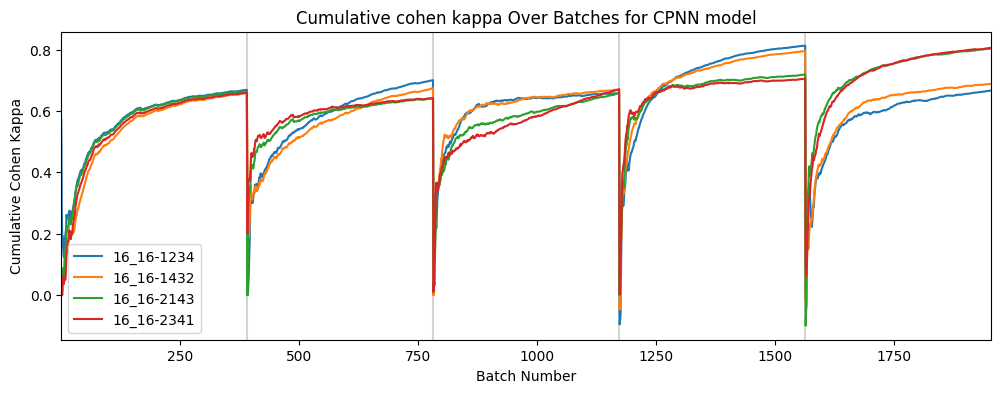

In [ ]:
df1 = np.array(pd.read_csv('results/kappa-cpnn-pretrain-t4-16_16-1234.csv'))
df2 = np.array(pd.read_csv('results/kappa-cpnn-pretrain-t4-16_16-1432.csv'))
df3 = np.array(pd.read_csv('results/kappa-cpnn-pretrain-t4-16_16-2143.csv'))
df4 = np.array(pd.read_csv('results/kappa-cpnn-pretrain-t4-16_16-2341.csv'))

def string_to_float(s):
    return float(s.strip('[]'))

# Apply the conversion function to each element in the array
df1 = pd.DataFrame(np.vectorize(string_to_float)(df1))
df2 = pd.DataFrame(np.vectorize(string_to_float)(df2))
df3 = pd.DataFrame(np.vectorize(string_to_float)(df3))
df4 = pd.DataFrame(np.vectorize(string_to_float)(df4))
# Create a DataFrame from the converted data
print( df1.mean(axis=1))
print( df2.mean(axis=1))
print( df3.mean(axis=1))
print( df4.mean(axis=1))

all_x=np.concatenate((df1,df2,df3,df4),axis=0)
y = np.cumsum(all_x, axis=1) / np.arange(1, all_x.shape[1] + 1)
vertical_lines_x = [all_x.shape[1], 2*all_x.shape[1], 3*all_x.shape[1],4*all_x.shape[1]]
x = list(range(1,5*all_x.shape[1] + 1))
fig, ax = plt.subplots(figsize=(12, 4))
ax.margins(x=0.0)
label_list=['16_16-1234','16_16-1432','16_16-2143','16_16-2341']

for i in vertical_lines_x:
  plt.axvline(x=i, color='#D3D3D3', linestyle='-')

for i in range(0,y.shape[0],5):
  ax.plot(x, np.concatenate((y[i],y[i+1],y[i+2],y[i+3],y[i+4]),axis=0), label= label_list[int(i/5)])
plt.xlabel('Batch Number')
plt.ylabel('Cumulative Cohen Kappa')
plt.title('Cumulative cohen kappa Over Batches for CPNN model')
plt.legend()
plt.show()

##Now we also train the pretrain model for each task of the test dataset.

hidden_size 50
list of accuracies that used for evaluating and selecting the models =  [0.5465625]
list of kappa values that used for evaluating and selecting the models =  [0.05764979]
index of selcted mask for this task 0
All batches Accuracy=  0.6001016260162602
All batches cohen kappa=  0.18626141800205148
list of accuracies that used for evaluating and selecting the models =  [0.685625 0.78375 ]
list of kappa values that used for evaluating and selecting the models =  [0.37376461 0.53510334]
index of selcted mask for this task 1
All batches Accuracy=  0.7469532359014066
All batches cohen kappa=  0.4785314711234557
list of accuracies that used for evaluating and selecting the models =  [0.58890625 0.55046875 0.48921875]
list of kappa values that used for evaluating and selecting the models =  [ 0.17681245  0.0642461  -0.06114527]
index of selcted mask for this task 0
All batches Accuracy=  0.6285044844496064
All batches cohen kappa=  0.24893058064977625
list of accuracies that used

All batches Accuracy=  0.7404019873532068
All batches cohen kappa=  0.4758338594523372


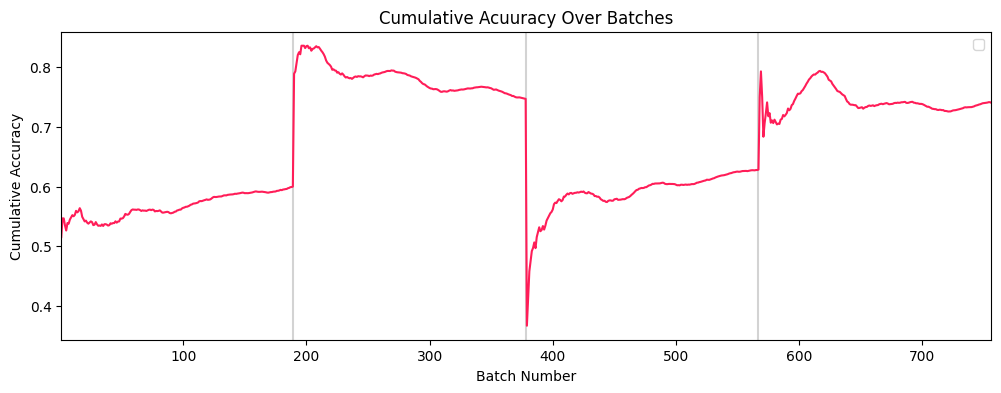

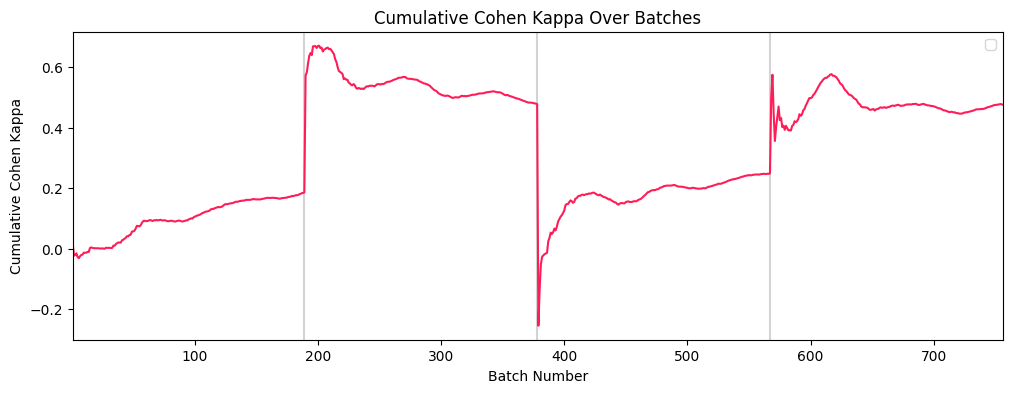

In [ ]:
input_size=4
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_1234"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden50.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-1234-_hidden50.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-1234-_hidden50.csv', index=False)

NameError: name 'pd' is not defined

hidden_size 50
list of accuracies that used for evaluating and selecting the models =  [0.50125]
list of kappa values that used for evaluating and selecting the models =  [0.03538977]
index of selcted mask for this task 0
All batches Accuracy=  0.5898503032649374
All batches cohen kappa=  0.17819434764336736
list of accuracies that used for evaluating and selecting the models =  [0.5609375  0.65171875]
list of kappa values that used for evaluating and selecting the models =  [0.13021015 0.24744183]
index of selcted mask for this task 1
All batches Accuracy=  0.7018456010452963
All batches cohen kappa=  0.384467666958848
list of accuracies that used for evaluating and selecting the models =  [0.6046875  0.648125   0.68546875]
list of kappa values that used for evaluating and selecting the models =  [0.21046538 0.27334601 0.35058282]
index of selcted mask for this task 2
All batches Accuracy=  0.6753290747193187
All batches cohen kappa=  0.3367703949112356
list of accuracies that used fo

All batches Accuracy=  0.7472062927474513
All batches cohen kappa=  0.4801917693801914


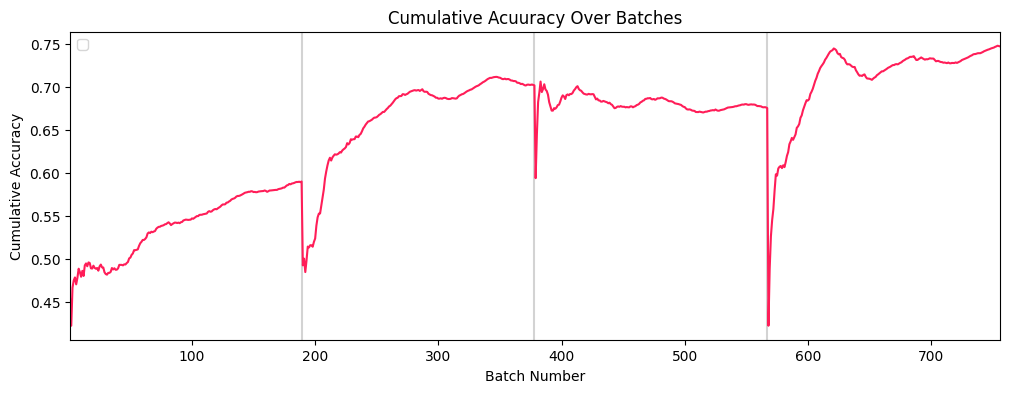

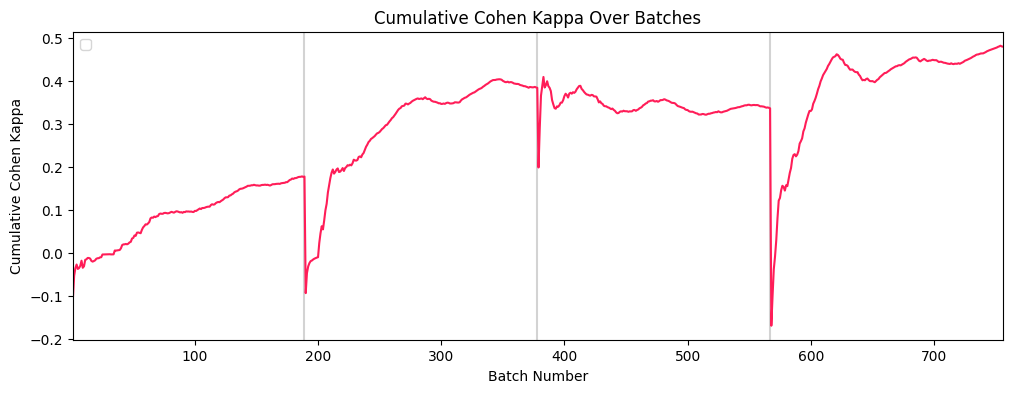

In [ ]:
input_size=4
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_1432"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden50.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-1432-_hidden50.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-1432-_hidden50.csv', index=False)

hidden_size 50
list of accuracies that used for evaluating and selecting the models =  [0.6134375]
list of kappa values that used for evaluating and selecting the models =  [0.23593981]
index of selcted mask for this task 0
All batches Accuracy=  0.6992142131242741
All batches cohen kappa=  0.3952858494693246
list of accuracies that used for evaluating and selecting the models =  [0.65046875 0.69546875]
list of kappa values that used for evaluating and selecting the models =  [0.28561514 0.36047467]
index of selcted mask for this task 1
All batches Accuracy=  0.6788466656987999
All batches cohen kappa=  0.34608777207396335
list of accuracies that used for evaluating and selecting the models =  [0.67421875 0.7171875  0.70828125]
list of kappa values that used for evaluating and selecting the models =  [0.34149554 0.40730199 0.38851233]
index of selcted mask for this task 1
All batches Accuracy=  0.7187842786165958
All batches cohen kappa=  0.4300875970896669
list of accuracies that used

All batches Accuracy=  0.7004915956897664
All batches cohen kappa=  0.39238624769465


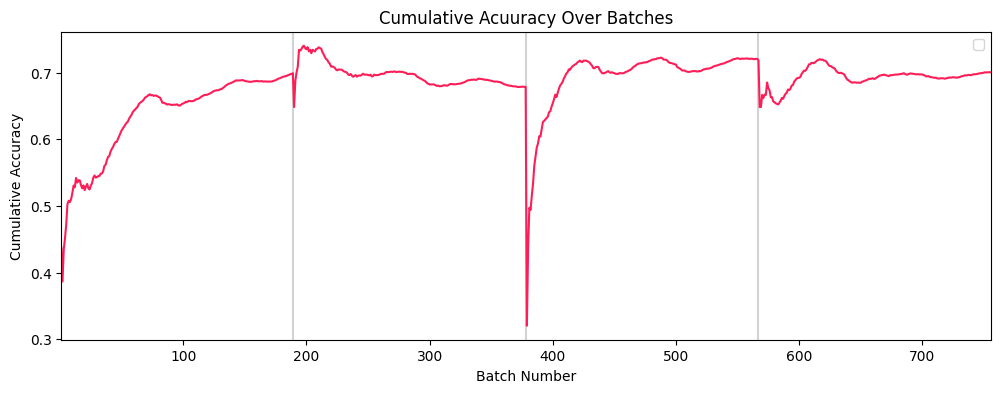

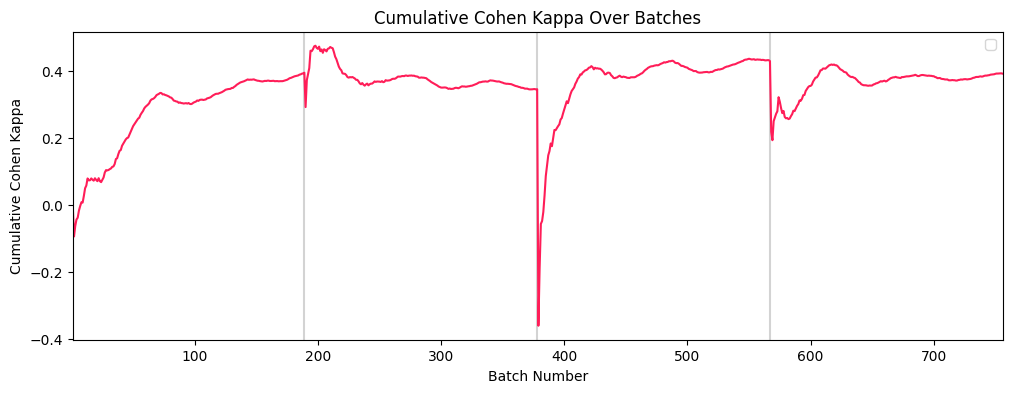

In [ ]:
input_size=4
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_2143"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden50.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-2143-_hidden50.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-2143-_hidden50.csv', index=False)

hidden_size 50
list of accuracies that used for evaluating and selecting the models =  [0.595]
list of kappa values that used for evaluating and selecting the models =  [0.15979602]
index of selcted mask for this task 0
All batches Accuracy=  0.6773011033681766
All batches cohen kappa=  0.3384825199270848
list of accuracies that used for evaluating and selecting the models =  [0.54328125 0.60265625]
list of kappa values that used for evaluating and selecting the models =  [0.08161946 0.16531088]
index of selcted mask for this task 1
All batches Accuracy=  0.6458817266744097
All batches cohen kappa=  0.27554438122863534
list of accuracies that used for evaluating and selecting the models =  [0.66     0.786875 0.82    ]
list of kappa values that used for evaluating and selecting the models =  [0.3212364  0.55520909 0.6235702 ]
index of selcted mask for this task 2
All batches Accuracy=  0.7677704381210478
All batches cohen kappa=  0.5275873145256093
list of accuracies that used for evalu

All batches Accuracy=  0.6644153681120144
All batches cohen kappa=  0.3237905886526855


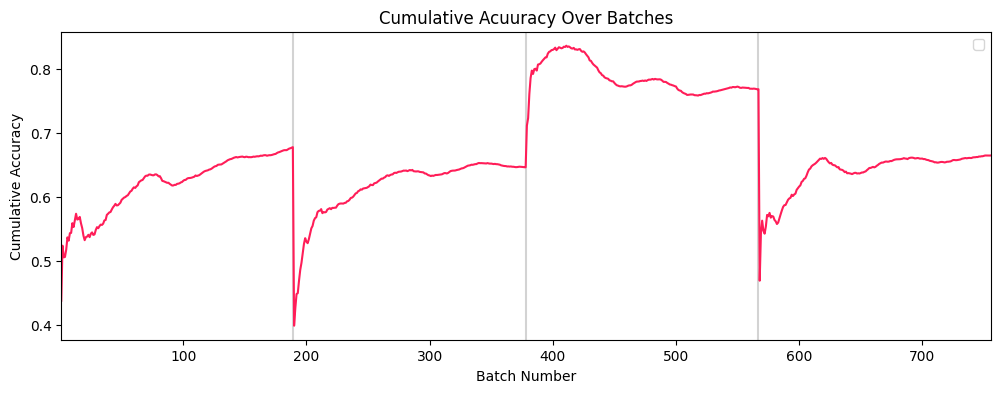

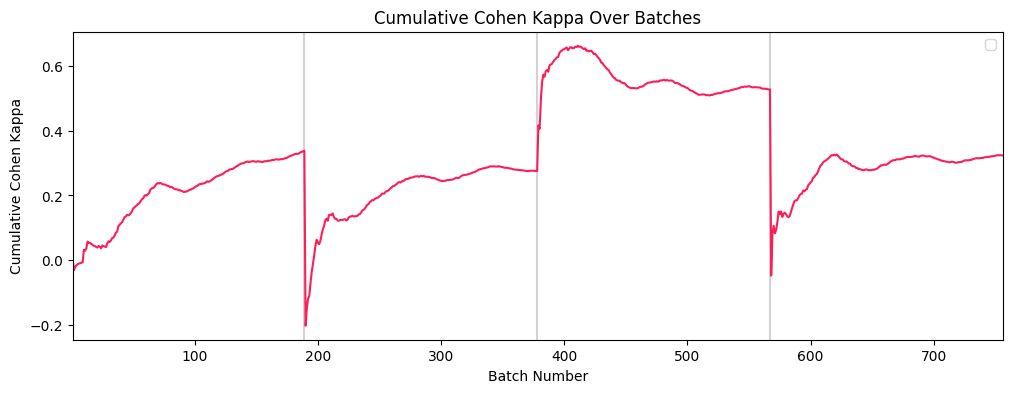

In [ ]:
input_size=4
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_2341"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden50.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-2341-_hidden50.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-2341-_hidden50.csv', index=False)

# hidden size 200:

hidden_size 200
list of accuracies that used for evaluating and selecting the models =  [0.5409375]
list of kappa values that used for evaluating and selecting the models =  [0.05115838]
index of selcted mask for this task 0
All batches Accuracy=  0.6070309475416182
All batches cohen kappa=  0.20257860179140513
list of accuracies that used for evaluating and selecting the models =  [0.72265625 0.82703125]
list of kappa values that used for evaluating and selecting the models =  [0.45353091 0.62375311]
index of selcted mask for this task 1
All batches Accuracy=  0.7905001855078074
All batches cohen kappa=  0.5659853482333125
list of accuracies that used for evaluating and selecting the models =  [0.5659375  0.61484375 0.64765625]
list of kappa values that used for evaluating and selecting the models =  [0.13811784 0.20433052 0.2877724 ]
index of selcted mask for this task 2
All batches Accuracy=  0.6691075058072009
All batches cohen kappa=  0.3242755269366267
list of accuracies that use

All batches Accuracy=  0.7914771260807847
All batches cohen kappa=  0.5776615701812916


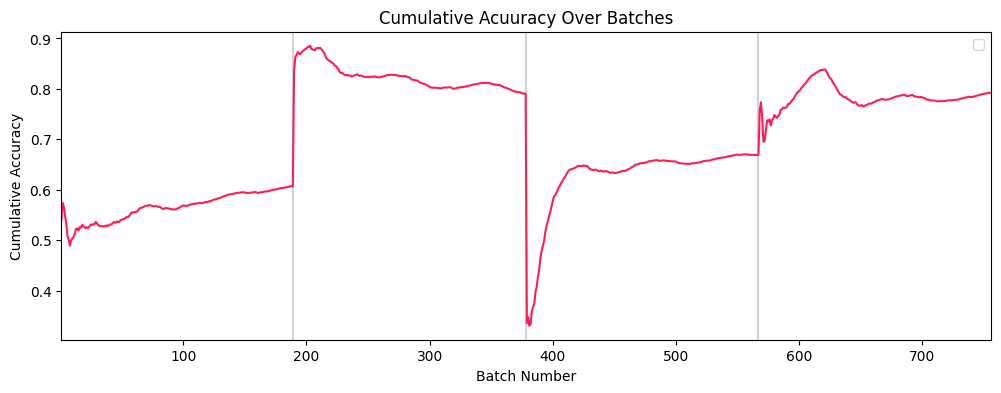

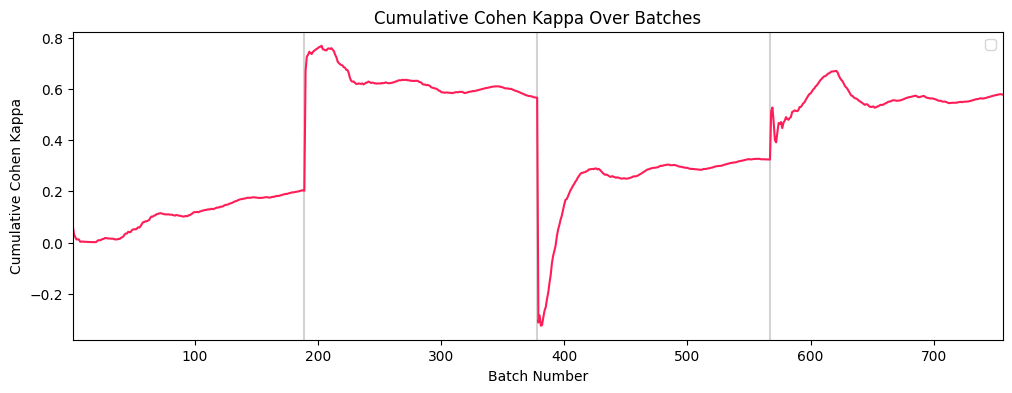

In [ ]:
input_size=4
batch_size = 128
hidden_size = 200
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_1234"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden200.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-1234-_hidden200.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-1234-_hidden200.csv', index=False)

hidden_size 200
list of accuracies that used for evaluating and selecting the models =  [0.57109375]
list of kappa values that used for evaluating and selecting the models =  [0.10209782]
index of selcted mask for this task 0
All batches Accuracy=  0.6372939250225835
All batches cohen kappa=  0.2638738233738988
list of accuracies that used for evaluating and selecting the models =  [0.64015625 0.76296875]
list of kappa values that used for evaluating and selecting the models =  [0.28255762 0.49140353]
index of selcted mask for this task 1
All batches Accuracy=  0.7588731207252549
All batches cohen kappa=  0.5038792906457155
list of accuracies that used for evaluating and selecting the models =  [0.5775     0.7125     0.74890625]
list of kappa values that used for evaluating and selecting the models =  [0.15005481 0.41230774 0.48843404]
index of selcted mask for this task 2
All batches Accuracy=  0.7028215334236677
All batches cohen kappa=  0.4016203937815532
list of accuracies that use

All batches Accuracy=  0.7925206074977418
All batches cohen kappa=  0.5809090353509105


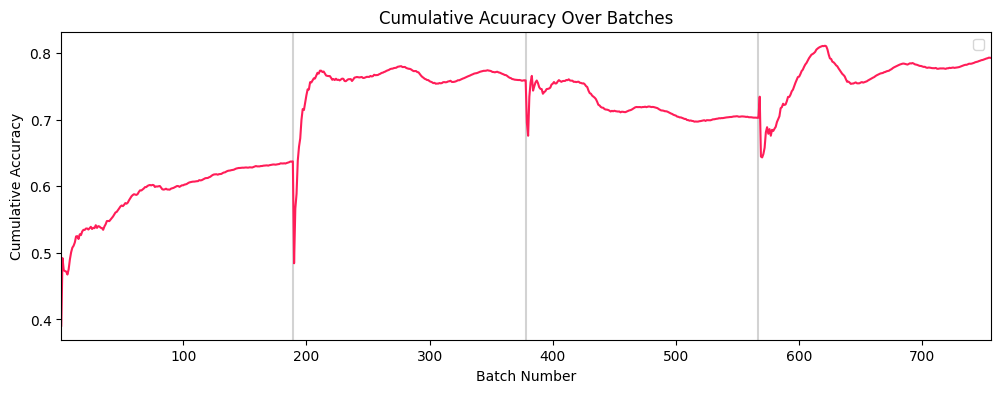

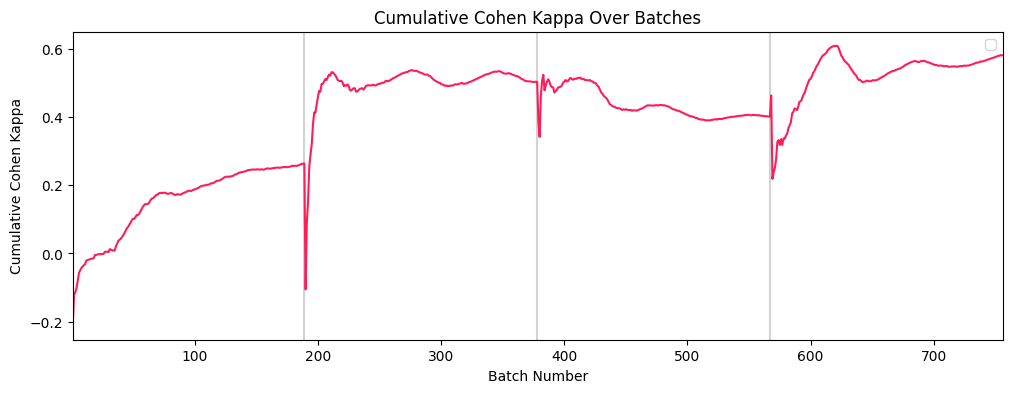

In [ ]:
input_size=4
batch_size = 128
hidden_size = 200
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_1432"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden200.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-1432-_hidden200.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-1432-_hidden200.csv', index=False)

hidden_size 200
list of accuracies that used for evaluating and selecting the models =  [0.60578125]
list of kappa values that used for evaluating and selecting the models =  [0.19388278]
index of selcted mask for this task 0
All batches Accuracy=  0.7132271099496709
All batches cohen kappa=  0.41323683435521114
list of accuracies that used for evaluating and selecting the models =  [0.67734375 0.728125  ]
list of kappa values that used for evaluating and selecting the models =  [0.34663439 0.43213659]
index of selcted mask for this task 1
All batches Accuracy=  0.6958307120273582
All batches cohen kappa=  0.38581294920196924
list of accuracies that used for evaluating and selecting the models =  [0.644375   0.76796875 0.77140625]
list of kappa values that used for evaluating and selecting the models =  [0.28922609 0.52754303 0.52924941]
index of selcted mask for this task 2
All batches Accuracy=  0.7588469076655052
All batches cohen kappa=  0.5124583173760031
list of accuracies that u

All batches Accuracy=  0.6917021551167893
All batches cohen kappa=  0.37978683518019146


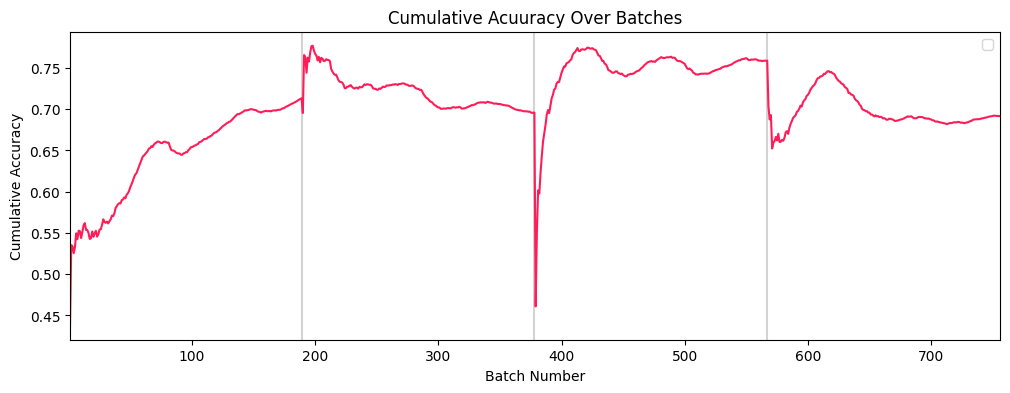

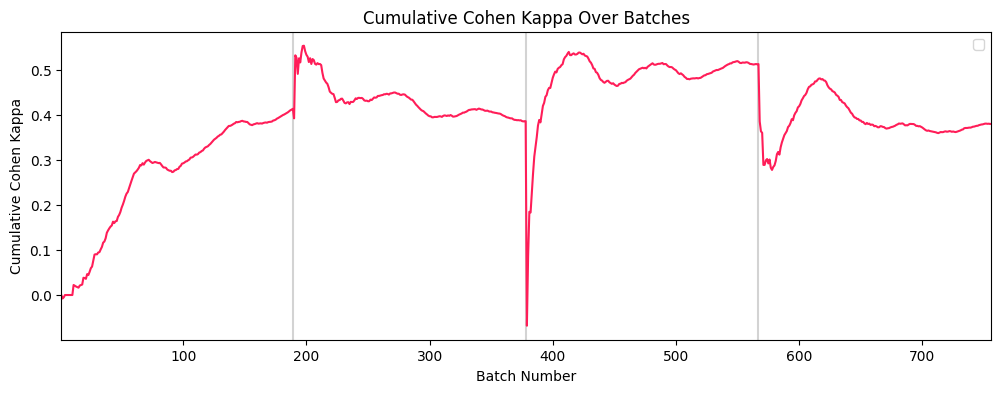

In [ ]:
input_size=4
batch_size = 128
hidden_size = 200
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_2143"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden200.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-2143-_hidden200.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-2143-_hidden200.csv', index=False)

hidden_size 200
list of accuracies that used for evaluating and selecting the models =  [0.5940625]
list of kappa values that used for evaluating and selecting the models =  [0.1807917]
index of selcted mask for this task 0
All batches Accuracy=  0.7019423877274487
All batches cohen kappa=  0.39489887716992705
list of accuracies that used for evaluating and selecting the models =  [0.60859375 0.66      ]
list of kappa values that used for evaluating and selecting the models =  [0.19021972 0.29273105]
index of selcted mask for this task 1
All batches Accuracy=  0.6858586591818299
All batches cohen kappa=  0.36103919326825434
list of accuracies that used for evaluating and selecting the models =  [0.64171875 0.84796875 0.87703125]
list of kappa values that used for evaluating and selecting the models =  [0.25838758 0.68579641 0.74667101]
index of selcted mask for this task 2
All batches Accuracy=  0.7859068508839852
All batches cohen kappa=  0.5689578592740603
list of accuracies that use

All batches Accuracy=  0.6956401632468705
All batches cohen kappa=  0.3857458955435841


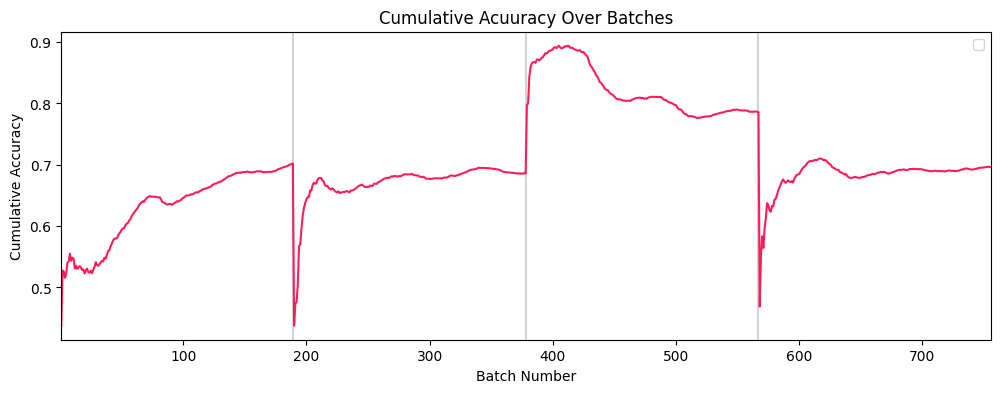

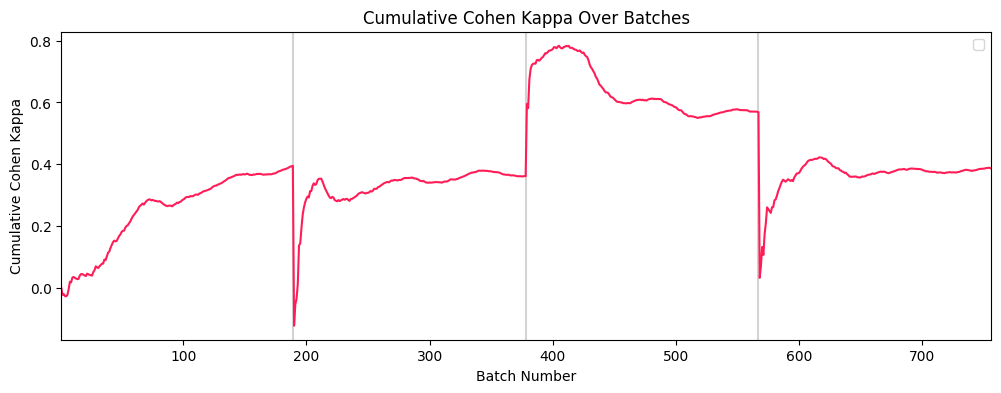

In [ ]:
input_size=4
batch_size = 128
hidden_size = 200
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_2341"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden200.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-2341-_hidden200.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-2341-_hidden200.csv', index=False)

# hidden size 250:

hidden_size 250
list of accuracies that used for evaluating and selecting the models =  [0.55734375]
list of kappa values that used for evaluating and selecting the models =  [0.06946449]
index of selcted mask for this task 0
All batches Accuracy=  0.6052897954574784
All batches cohen kappa=  0.19713616259667097
list of accuracies that used for evaluating and selecting the models =  [0.71265625 0.7903125 ]
list of kappa values that used for evaluating and selecting the models =  [0.43264336 0.5456844 ]
index of selcted mask for this task 1
All batches Accuracy=  0.7716197251258228
All batches cohen kappa=  0.5299622208895113
list of accuracies that used for evaluating and selecting the models =  [0.5525     0.5996875  0.57453125]
list of kappa values that used for evaluating and selecting the models =  [0.12390442 0.17709662 0.12280842]
index of selcted mask for this task 1
All batches Accuracy=  0.6207807055749128
All batches cohen kappa=  0.22999304858598088
list of accuracies that u

All batches Accuracy=  0.805273261065944
All batches cohen kappa=  0.6060968133369609


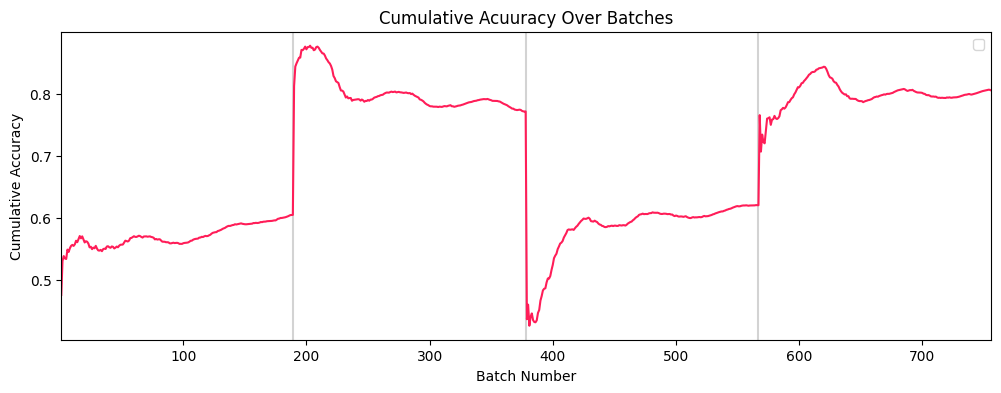

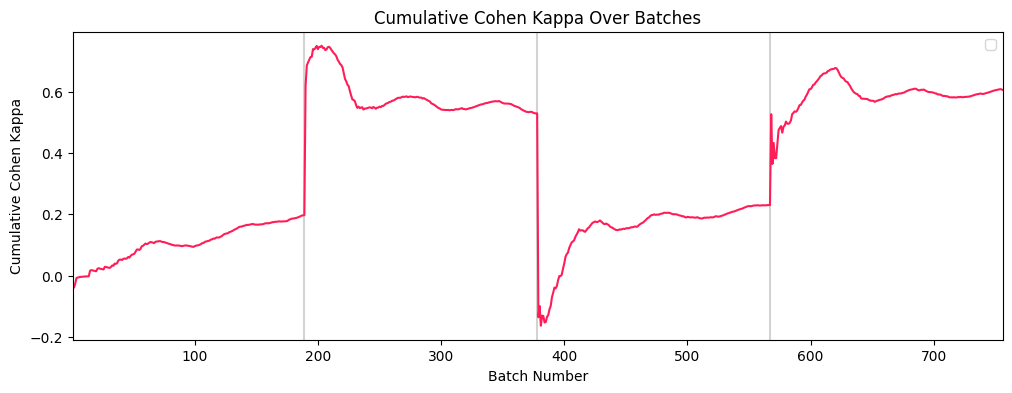

In [ ]:
input_size=4
batch_size = 128
hidden_size = 250
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_1234"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden250.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-1234-_hidden250.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-1234-_hidden250.csv', index=False)

hidden_size 250
list of accuracies that used for evaluating and selecting the models =  [0.55359375]
list of kappa values that used for evaluating and selecting the models =  [0.05749594]
index of selcted mask for this task 0
All batches Accuracy=  0.61460551361466
All batches cohen kappa=  0.21026031097407064
list of accuracies that used for evaluating and selecting the models =  [0.66359375 0.7765625 ]
list of kappa values that used for evaluating and selecting the models =  [0.3350779  0.51862431]
index of selcted mask for this task 1
All batches Accuracy=  0.7807862304813524
All batches cohen kappa=  0.5480143743451369
list of accuracies that used for evaluating and selecting the models =  [0.58296875 0.71359375 0.7553125 ]
list of kappa values that used for evaluating and selecting the models =  [0.17179277 0.41836081 0.50278918]
index of selcted mask for this task 2
All batches Accuracy=  0.6957278761775714
All batches cohen kappa=  0.38006134730610974
list of accuracies that use

All batches Accuracy=  0.788975795263905
All batches cohen kappa=  0.5727811068611801


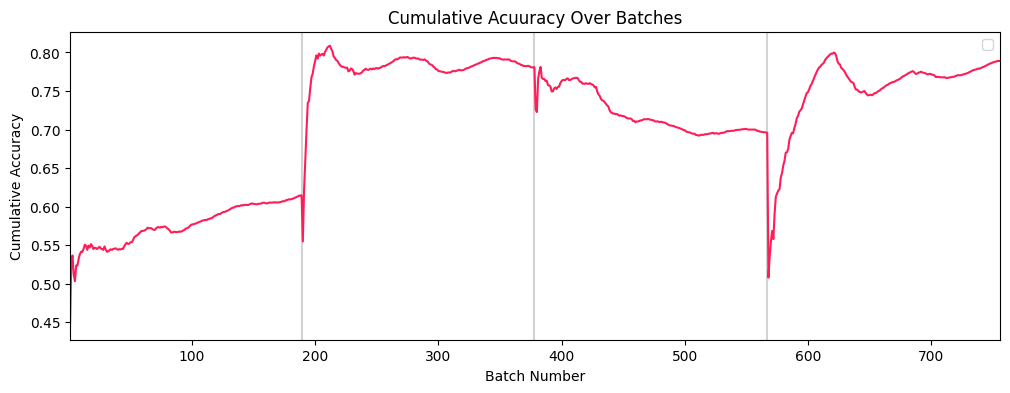

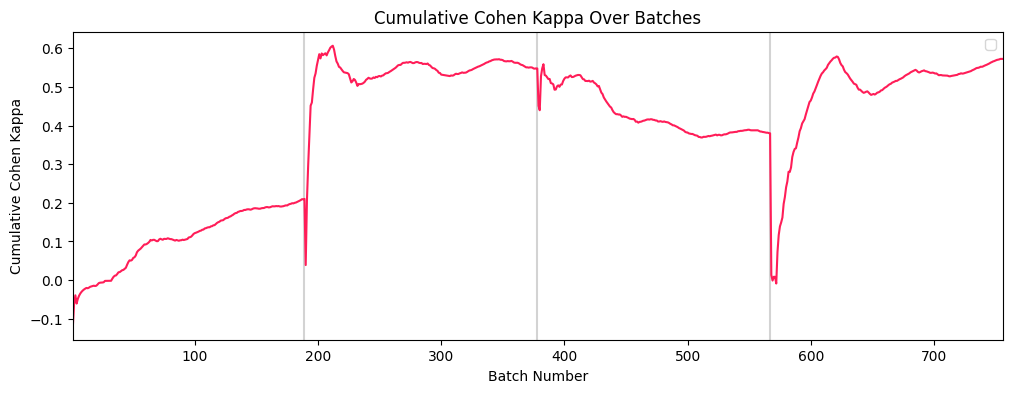

In [ ]:
input_size=4
batch_size = 128
hidden_size = 250
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_1432"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden250.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-1432-_hidden250.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-1432-_hidden250.csv', index=False)

hidden_size 250
list of accuracies that used for evaluating and selecting the models =  [0.55609375]
list of kappa values that used for evaluating and selecting the models =  [0.12066239]
index of selcted mask for this task 0
All batches Accuracy=  0.7079875225835592
All batches cohen kappa=  0.4115553257651824
list of accuracies that used for evaluating and selecting the models =  [0.69546875 0.7484375 ]
list of kappa values that used for evaluating and selecting the models =  [0.37996826 0.48100803]
index of selcted mask for this task 1
All batches Accuracy=  0.7201413085559428
All batches cohen kappa=  0.4321479348160287
list of accuracies that used for evaluating and selecting the models =  [0.68078125 0.78109375 0.7859375 ]
list of kappa values that used for evaluating and selecting the models =  [0.34876302 0.55281371 0.55664997]
index of selcted mask for this task 2
All batches Accuracy=  0.7723284859336688
All batches cohen kappa=  0.5371544538509279
list of accuracies that use

All batches Accuracy=  0.6933918892760356
All batches cohen kappa=  0.38726082511699544


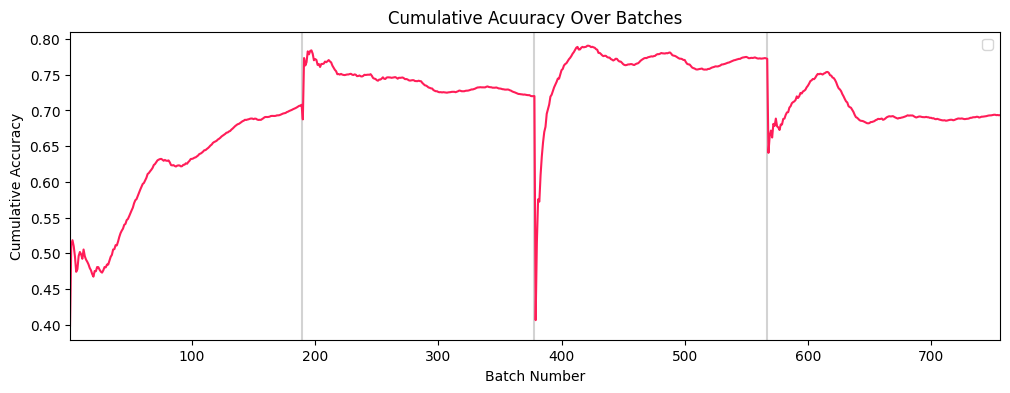

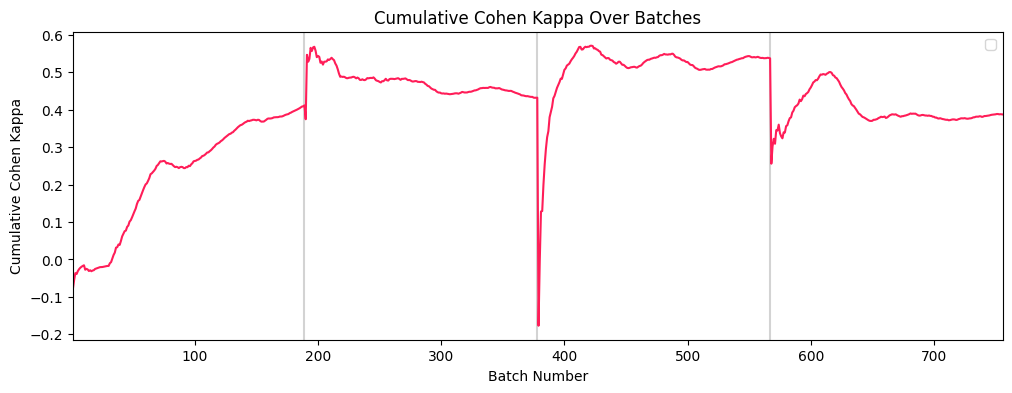

In [ ]:
input_size=4
batch_size = 128
hidden_size = 250
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_2143"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden250.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-2143-_hidden250.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-2143-_hidden250.csv', index=False)

hidden_size 250
list of accuracies that used for evaluating and selecting the models =  [0.54078125]
list of kappa values that used for evaluating and selecting the models =  [0.07327348]
index of selcted mask for this task 0
All batches Accuracy=  0.6894175861401471
All batches cohen kappa=  0.3720602420757392
list of accuracies that used for evaluating and selecting the models =  [0.5771875 0.646875 ]
list of kappa values that used for evaluating and selecting the models =  [0.13965856 0.2594989 ]
index of selcted mask for this task 1
All batches Accuracy=  0.6744237159633502
All batches cohen kappa=  0.33649066195542376
list of accuracies that used for evaluating and selecting the models =  [0.66203125 0.835625   0.85125   ]
list of kappa values that used for evaluating and selecting the models =  [0.32179504 0.66144227 0.68907641]
index of selcted mask for this task 2
All batches Accuracy=  0.7802236578913407
All batches cohen kappa=  0.556225665386707
list of accuracies that used 

All batches Accuracy=  0.6731322186733772
All batches cohen kappa=  0.34442696187931


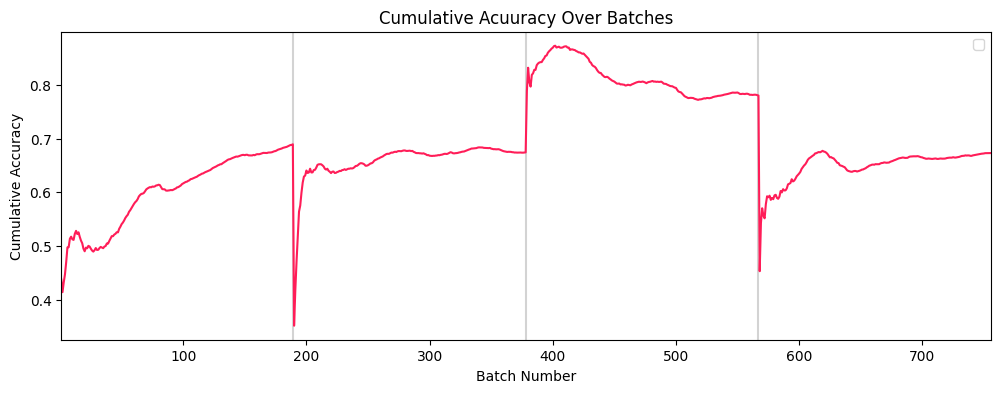

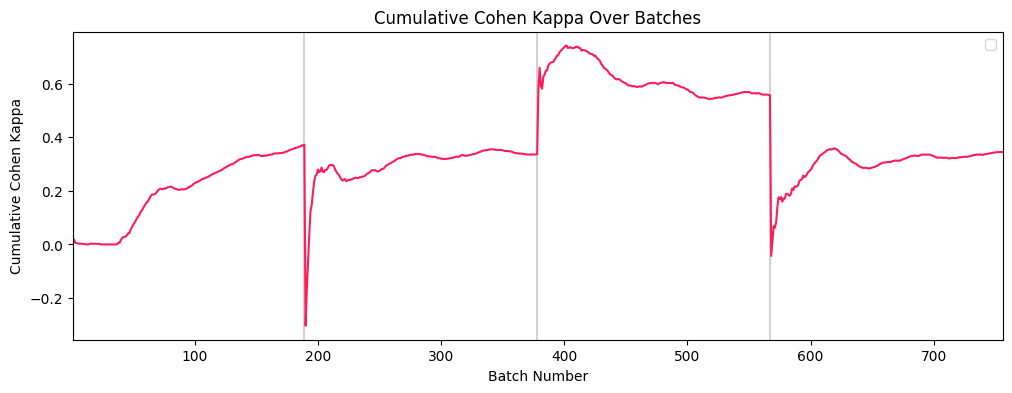

In [ ]:
input_size=4
batch_size = 128
hidden_size = 250
seq_len = 10
epoch_size=5
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
mask_init='uniform'
dataset = "weather_mountain_ta_st124_2341"
df = pd.read_csv(os.path.join("datasets/datasets/weather", f"{dataset}.csv"))
pretrain_model_addr='performance/pretrain/GRU/weather/weather_mountain_ta_st125_pretrain_hidden250.pickle'
mask_weights=[]

model=cPB(model_class=PiggyBackGRU, lr = lr ,hidden_size=hidden_size, seq_len=seq_len, pretrain_model_addr=pretrain_model_addr,
           mask_weights=mask_weights, mask_init=mask_init, number_of_tasks=number_of_tasks,epoch_size=epoch_size,input_size=input_size)
iteration=1
# first loop for the iterations, for now it is just 1 iteration.
for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column()
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


In [ ]:
pd.DataFrame(model.all_batch_acc).to_csv('results/weather/acc-CPB-2341-_hidden250.csv', index=False)
pd.DataFrame(model.all_batch_kappa).to_csv('results/weather/kappa-CPB-2341-_hidden250.csv', index=False)